In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [179]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [180]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train['PassengerId'].nunique()

891

In [10]:
train['source']='train'
test['source']='test'

In [11]:
df_all=pd.concat([train,test],axis=0)

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [13]:
df_all.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,train
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,train
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,train


In [14]:
# only the test rows are with null for Survived column
df_all.Survived.isnull().sum()

418

In [15]:
df_all.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [16]:
df_all.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [17]:
df_all.Name.isnull().sum()

0

In [18]:
df_all.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [19]:
df_all.Age.isnull().sum()

263

In [20]:
df_all['FamilyName'],df_all['FirstName']=df_all['Name'].str.split(',',1).str
df_all.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,FamilyName,FirstName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Braund,Mr. Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Heikkinen,Miss. Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Allen,Mr. William Henry


<AxesSubplot:>

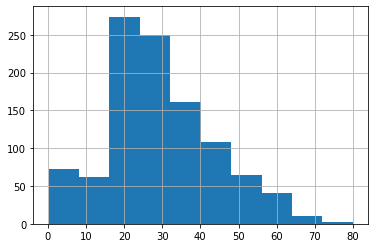

In [21]:
df_all.Age.hist()

In [22]:
df_all['Title'],df_all['FirstName']=df_all['FirstName'].str.split('.',1).str

In [23]:
df_all.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [24]:
# Age is null for 263 rows and we can replace the null with the mean for that Title, Sex, Pclass and Embarked
# First we will groupby the columns and find the mean
# After that we will update the null values of the Age with respective mean

In [25]:
df_all['Age'].isnull().sum()

263

In [26]:
df_groupby_age_mean=df_all.groupby(['Title','Sex','Pclass','Embarked'])['Age'].mean()
df_groupby_age_mean=pd.DataFrame(df_groupby_age_mean)
df_groupby_age_mean=df_groupby_age_mean.reset_index()
df_groupby_age_mean


,Title,Sex,Pclass,Embarked,Age
0,Capt,male,1,S,70.000000
1,Col,male,1,C,52.000000
2,Col,male,1,S,60.000000
3,Don,male,1,C,40.000000
4,Dona,female,1,C,39.000000
5,Dr,female,1,S,49.000000
6,Dr,male,1,C,32.000000
7,Dr,male,1,Q,44.000000
8,Dr,male,1,S,51.500000
9,Dr,male,2,S,38.500000


In [27]:
def find_age(row):
    Age_to_replace = df_groupby_age_mean[(df_groupby_age_mean['Title']== row['Title']) & (df_groupby_age_mean['Sex'] == row['Sex']) & (df_groupby_age_mean['Pclass'] == row['Pclass']) & (df_groupby_age_mean['Embarked'] == row['Embarked'])]['Age'].values[0]
    if np.isnan(Age_to_replace):
        Age_to_replace = df_groupby_age_mean[(df_groupby_age_mean['Title']== row['Title']) & (df_groupby_age_mean['Sex'] == row['Sex']) & (df_groupby_age_mean['Pclass'] == row['Pclass'])]['Age'].values[0]
    if np.isnan(Age_to_replace):
        Age_to_replace = df_groupby_age_mean[(df_groupby_age_mean['Title']== row['Title']) & (df_groupby_age_mean['Sex'] == row['Sex'])]['Age'].values[0]
    if np.isnan(Age_to_replace):
        Age_to_replace = df_groupby_age_mean[(df_groupby_age_mean['Title']== row['Title'])]['Age'].values[0]
    if np.isnan(Age_to_replace):
        Age_to_replace = df_groupby_age_mean[(df_groupby_age_mean['Sex']== row['Sex'])]['Age'].values[0]
    return Age_to_replace

In [28]:
df_all['Age']=df_all.apply(lambda row:find_age(row) if (np.isnan(row['Age'])) else row['Age'], axis=1)

In [29]:
df_all[df_all['Age'].isnull()]['Title'].value_counts()

Series([], Name: Title, dtype: int64)

In [30]:
df_all.groupby(['Title','Sex','Pclass','Embarked'])['Age'].mean()

Title          Sex     Pclass  Embarked
 Capt          male    1       S           70.000000
 Col           male    1       C           52.000000
                               S           60.000000
 Don           male    1       C           40.000000
 Dona          female  1       C           39.000000
 Dr            female  1       S           49.000000
               male    1       C           32.000000
                               Q           44.000000
                               S           51.500000
                       2       S           38.500000
 Jonkheer      male    1       S           38.000000
 Lady          female  1       C           48.000000
 Major         male    1       S           48.500000
 Master        male    1       C            9.500000
                               S            5.306667
                       2       C            1.000000
                               S            2.933000
                       3       C            6.355000
      

In [31]:
df_all[(df_all['Title'].str.contains('Ms')) | (df_all['Ticket']=='364856') ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,FamilyName,FirstName,Title
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,NaN,S,train,Reynaldo,Encarnacion,Ms
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,28.0,0,0,364856,7.75,NaN,Q,test,O'Donoghue,Bridget,Ms


<AxesSubplot:>

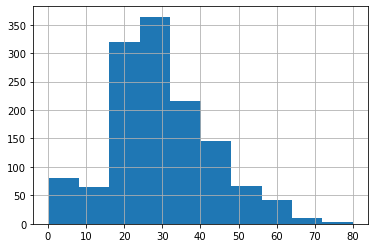

In [32]:
df_all.Age.hist()

In [33]:
# since SibSp of all rows are not null and there is a correlation with Survived status, we will 
# keep the column 

In [34]:
df_all.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [35]:
df_all.SibSp.isnull().sum()

0

In [36]:
# since most of the columns values are null for cabin, we can drop the cabin column

In [37]:
df_all.Cabin.isnull().sum()

1014

In [38]:
# since most of the columns values are null for cabin, we can drop the cabin column
df_all=df_all.drop(["Cabin"],axis=1)

In [39]:
# The people who are travelling in groups like familes,friends etc are having the 
#same ticket number for all members of the group; And the passengers in group 
#survived better than passengers travelled alone

In [40]:
# to assign the family ticket
ticket=pd.DataFrame(df_all.groupby(by=['Ticket']).PassengerId.count())
ticket=ticket.reset_index()
group_ticket=pd.DataFrame(ticket[ticket['PassengerId'] > 1].Ticket)
group_ticket

,Ticket
0,110152
1,110413
2,110465
6,110813
10,111361
...,...
913,STON/O2. 3101279
923,W./C. 6607
924,W./C. 6608
926,W.E.P. 5734


In [41]:
df_all['GroupTkt']=df_all['Ticket'].isin(group_ticket.Ticket).astype(int)

In [42]:

df_all['Family_Size'] = df_all['Parch'] + df_all['SibSp']

In [43]:
# there was one record which did not have the value for the Fare. We are replacing it with the mean of Fair for the Class-3 and Embarked at S

In [44]:
df_all[df_all.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source,FamilyName,FirstName,Title,GroupTkt,Family_Size
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,test,Storey,Thomas,Mr,0,0


In [45]:
df_all['Fare']=df_all['Fare'].fillna(df_all[(df_all['Embarked']=='S') & (df_all['Pclass'] == 3) & (df_all['GroupTkt']==0)]['Fare'].mean())

In [46]:
df_all[df_all.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source,FamilyName,FirstName,Title,GroupTkt,Family_Size


In [47]:
# The gender we will make it as 1 for male and 0 for female
# Female had survived more than male

In [48]:
df_all['Sex']=np.where(df_all['Sex']=='male',1,0)

In [49]:
# Need to do get_dummies for Embarked column and re-check the corr
# as of now, Survived, Pclass, Sex (after converting as 1(male),0(female), Fare are having correlation
#- Parch also has some correlation
# drop columns cabin

In [50]:
df_all.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,GroupTkt,Family_Size
PassengerId,1.000000,-0.005007,-0.038354,0.013406,0.021881,-0.055224,0.008942,0.031029,-0.015731,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.066161,-0.035322,0.081629,0.257307,0.252939,0.016639
Pclass,-0.038354,-0.338481,1.000000,0.124617,-0.427894,0.060832,0.018322,-0.558740,-0.283445,0.050027
Sex,0.013406,-0.543351,0.124617,1.000000,0.079155,-0.109609,-0.213125,-0.185744,-0.303803,-0.188583
Age,0.021881,-0.066161,-0.427894,0.079155,1.000000,-0.232004,-0.147034,0.183233,-0.085941,-0.232967
SibSp,-0.055224,-0.035322,0.060832,-0.109609,-0.232004,1.000000,0.373587,0.160388,0.442977,0.861952
Parch,0.008942,0.081629,0.018322,-0.213125,-0.147034,0.373587,1.000000,0.221668,0.445944,0.792296
Fare,0.031029,0.257307,-0.558740,-0.185744,0.183233,0.160388,0.221668,1.000000,0.452805,0.226653
GroupTkt,-0.015731,0.252939,-0.283445,-0.303803,-0.085941,0.442977,0.445944,0.452805,1.000000,0.535111
Family_Size,-0.031437,0.016639,0.050027,-0.188583,-0.232967,0.861952,0.792296,0.226653,0.535111,1.000000


In [51]:
# Two records, don't have any value for the Embarked column. 
# the two records which are null for 'Embarked' column are from the same family and survived. 
# So for imputation, taking the most frequent Embarked value of Survived and both needs to be 
# same value as they are from the same family

In [52]:
df_all[df_all.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source,FamilyName,FirstName,Title,GroupTkt,Family_Size
61,62,1.0,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,NaN,train,Icard,Amelie,Miss,1,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,NaN,train,Stone,George Nelson (Martha Evelyn),Mrs,1,0


In [53]:

df_all['Embarked']=df_all['Embarked'].fillna('S')

In [54]:
df_all[df_all.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source,FamilyName,FirstName,Title,GroupTkt,Family_Size


In [55]:
# As mentioned earlier the more number of people boarded at S and 219 of them survived

In [56]:
df_all.groupby(by=['Survived','Embarked']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived Embarked                                                              
0.0      C                  75      75    75   75   75     75     75      75   
         Q                  47      47    47   47   47     47     47      47   
         S                 427     427   427  427  427    427    427     427   
1.0      C                  93      93    93   93   93     93     93      93   
         Q                  30      30    30   30   30     30     30      30   
         S                 219     219   219  219  219    219    219     219   

                   Fare  source  FamilyName  FirstName  Title  GroupTkt  \
Survived Embarked                                                         
0.0      C           75      75          75         75     75        75   
         Q           47      47          47         47     47        47   
         S          427     427         427        427    427       427   
1.0      C           93      93          93         93     93        93   
         Q           30      30          30         30     30        30   
         S          219     219         219        219    219       219   

                   Family_Size  
Survived Embarked               
0.0      C                  75  
         Q                  47  
         S                 427  
1.0      C                  93  
         Q                  30  
         S                 219

In [57]:
# create dummies column for Embarked 

In [58]:
## changed from one-hot encoding to label encoding (ordinal) on saturday morning to see the impact
#df_to_encode=df_all['Embarked']
#encoded=pd.get_dummies(df_to_encode,prefix='Embarked',prefix_sep='_')
#encoded.head()

In [ ]:
df_to_encode=df_all['Embarked']
encoded=pd.get_dummies(df_to_encode,prefix='Embarked',prefix_sep='_')

In [59]:
#embarked_order = {'S' : 0, 'C' : 1, 'Q' : 2}
#df_all['Embarked'] = df_all['Embarked'].map(embarked_order)

In [60]:
df_all=pd.concat([df_all,encoded],axis=1)

In [61]:
# Decided to keep Pclass as it is, without encoding; to see any impact - on 21 nov, sat, morning 11 am
#create dummies column for Pclass

In [62]:

#df_to_encode=df_all['Pclass']
#encoded=pd.get_dummies(df_to_encode,prefix='Pclass',prefix_sep='_')

In [63]:
#encoded.head()

In [64]:
#df_all=pd.concat([df_all,encoded],axis=1)

In [65]:
#Since Pclass is having very small GINI in feature_importance, we are removing the column itself,
# including the dummy variables also, that was the reason the previous steps are commented out
#df_all=df_all.drop(['Pclass'],axis=1)

In [66]:
# Since only 5 or 6 titles are covering the majority of the population. 
# And we will create the dummies for the Title, the less frequent one are 
# considered under others column  

In [67]:
df_all['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [68]:
Title_map = {' Mr':'Mr',' Mrs':'Mrs',' Miss':'Miss',' Master':'Master',' Don':'Others',' Rev':'Others',' Dr':'Others',' Mme':'Others',' Ms':'Miss',' Major':'Others',' Lady':'Others',' Sir':'Others',' Mlle':'Others',' Col':'Others',' Capt':'Others',' the Countess':'Others',' Jonkheer':'Others',' Dona':'Others'}
df_all['Title']=df_all.Title.replace(Title_map)
df_all['Title'].value_counts()

Mr        757
Miss      262
Mrs       197
Master     61
Others     32
Name: Title, dtype: int64

In [69]:
title_to_encode=df_all['Title']
title_encoded=pd.get_dummies(title_to_encode,prefix='Title',prefix_sep='_')

In [70]:
df_all=pd.concat([df_all,title_encoded],axis=1)

In [71]:
df_all['Fare'].value_counts()

8.050000     60
13.000000    59
7.750000     55
26.000000    50
7.895800     49
             ..
33.500000     1
7.800000      1
26.387500     1
8.052067      1
7.141700      1
Name: Fare, Length: 282, dtype: int64

In [72]:
df_all['Fare'].describe()
df_all[df_all['Fare'] > 68].count()

PassengerId     169
Survived        114
Pclass          169
Name            169
Sex             169
Age             169
SibSp           169
Parch           169
Ticket          169
Fare            169
Embarked        169
source          169
FamilyName      169
FirstName       169
Title           169
GroupTkt        169
Family_Size     169
Title_Master    169
Title_Miss      169
Title_Mr        169
Title_Mrs       169
Title_Others    169
dtype: int64

In [73]:
# To bin age & fare to see whether it gives any improvement in score; currently it is in range of numbers & 169 records of Fare value are outliers
df_all['Age_range'] = 0
df_all.loc[df_all['Age'] <= 16, 'Age_range'] = 0
df_all.loc[(df_all['Age'] > 16) & (df_all['Age'] <= 32), 'Age_range'] = 1
df_all.loc[(df_all['Age'] > 32) & (df_all['Age'] <= 48), 'Age_range'] = 2
df_all.loc[(df_all['Age'] > 48) & (df_all['Age'] <= 64), 'Age_range'] = 3
df_all.loc[(df_all['Age'] > 64), 'Age_range' ] = 4


In [74]:
df_all['Fare_Range'] = pd.qcut(df_all['Fare'],4)

In [75]:
df_all['Fare_Range'].value_counts()

(-0.001, 7.896]      337
(14.454, 31.275]     328
(31.275, 512.329]    323
(7.896, 14.454]      321
Name: Fare_Range, dtype: int64

In [76]:
df_all['Fare_Cat'] = 0
df_all.loc[(df_all['Fare'] <= 7.90), 'Fare_Cat'] = 0
df_all.loc[(df_all['Fare'] > 7.90) & (df_all['Fare'] <= 15), 'Fare_Cat'] = 1
df_all.loc[(df_all['Fare'] > 15) & (df_all['Fare'] <= 31.275), 'Fare_Cat'] = 2
df_all.loc[(df_all['Fare'] > 31.275) & (df_all['Fare'] <= 513), 'Fare_Cat'] = 3

In [77]:
df_all['Fare_Cat'].value_counts()

1    337
0    337
3    323
2    312
Name: Fare_Cat, dtype: int64

In [78]:
df_all=df_all.drop(columns=['Title'],axis=1)

In [79]:
df_all=df_all.drop(columns=['Name','FirstName','FamilyName','Ticket','Fare','Fare_Range','Age','Title_Others','Title_Master'],axis=1)

In [80]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int32  
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1309 non-null   int64  
 7   source       1309 non-null   object 
 8   GroupTkt     1309 non-null   int32  
 9   Family_Size  1309 non-null   int64  
 10  Title_Miss   1309 non-null   uint8  
 11  Title_Mr     1309 non-null   uint8  
 12  Title_Mrs    1309 non-null   uint8  
 13  Age_range    1309 non-null   int64  
 14  Fare_Cat     1309 non-null   int64  
dtypes: float64(1), int32(2), int64(8), object(1), uint8(3)
memory usage: 126.6+ KB


In [81]:
# removing the age_range from dropping on 25th Nov

df_col_to_drop = df_all[['Family_Size','Embarked']]
df_all=df_all.drop(columns=['Family_Size','Embarked'])
#df_col_to_drop = df_all[['Family_Size','Embarked','Age_range']]
#df_all=df_all.drop(columns=['Family_Size','Embarked','Age_range'])

In [82]:
# as these features are having low Gini index (approx <1%)as indicated in the feature_importance, dropping the same
## COMMENTED THE NEXT STATEMENT ON FRIDAY NIGHT 1.59 AM to check again
#df_all=df_all.drop(columns=['Embarked_C','Embarked_Q','Embarked_S'])

In [83]:
## COMMENTED THE NEXT STATEMENT ON FRIDAY NIGHT 2 AM TO CHECK AGAIN
## uncommenting the next statement on Saturday Mornig 4.20 AM as the blended model is giving only 77.99 score

#df_all=df_all.drop(columns=['SibSp','Parch'])

In [84]:
## COMMENTED THE NEXT STATEMENT ON FRIDAY NIGHT 2 AM TO CHECK AGAIN
#df_all=df_all.drop(['Title_Others','Pclass_2','Pclass_1','Title_Master','GroupTkt'],axis=1)

In [85]:
#Since the feature_importance is indicating the Sex is having higher Gini as well as 
# higher correlation with Survived column, 
# we are keeping this column
#df_all=df_all.drop(columns=['Sex'])

In [86]:
df_all.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,GroupTkt,Title_Miss,Title_Mr,Title_Mrs,Age_range,Fare_Cat
PassengerId,1.000000,-0.005007,-0.038354,0.013406,-0.055224,0.008942,-0.015731,-0.049668,0.014116,0.034473,0.011245,-0.011256
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.252939,0.329948,-0.549199,0.339040,-0.058242,0.311526
Pclass,-0.038354,-0.338481,1.000000,0.124617,0.060832,0.018322,-0.283445,0.031326,0.121492,-0.178808,-0.410879,-0.671102
Sex,0.013406,-0.543351,0.124617,1.000000,-0.109609,-0.213125,-0.303803,-0.672819,0.870678,-0.566111,0.062844,-0.230363
SibSp,-0.055224,-0.035322,0.060832,-0.109609,1.000000,0.373587,0.442977,0.077564,-0.243104,0.065098,-0.215015,0.371719
Parch,0.008942,0.081629,0.018322,-0.213125,0.373587,1.000000,0.445944,0.066473,-0.304780,0.217673,-0.128015,0.360497
GroupTkt,-0.015731,0.252939,-0.283445,-0.303803,0.442977,0.445944,1.000000,0.064061,-0.384163,0.331656,-0.072907,0.726669
Title_Miss,-0.049668,0.329948,0.031326,-0.672819,0.077564,0.066473,0.064061,1.000000,-0.585809,-0.210551,-0.263119,0.021630
Title_Mr,0.014116,-0.549199,0.121492,0.870678,-0.243104,-0.304780,-0.384163,-0.585809,1.000000,-0.492900,0.173829,-0.295363
Title_Mrs,0.034473,0.339040,-0.178808,-0.566111,0.065098,0.217673,0.331656,-0.210551,-0.492900,1.000000,0.203804,0.265841


In [87]:
x=df_all.select_dtypes(include=np.number).drop(columns=["Survived"])
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

        feature        VIF
0   PassengerId   3.954383
1        Pclass  21.314989
2           Sex  36.871479
3         SibSp   1.888670
4         Parch   1.703506
5      GroupTkt   5.104060
6    Title_Miss   9.179083
7      Title_Mr  11.769500
8     Title_Mrs   8.194157
9     Age_range   5.289095
10     Fare_Cat  11.608700


In [88]:
df_train=df_all[df_all['source']=='train']
df_test=df_all[df_all['source']=='test']

In [89]:
## COMMENTED THE FOLLOWING STATEMENT OF DROPPING PASSENGERID ON FRIDAY NIGHT 2 AM (earlier than 25th nov)

# dropping PassengerId as it gives higher correlation and feature_importance_ but actually it is a continuous unique number
# using pop as we need it again to merge for generating the submission file

# uncommenting the same on Wednesday - 25th Nov
df_train_PassengerId =df_train.pop('PassengerId')
df_test_PassengerId = df_test.pop('PassengerId')

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   source      891 non-null    object 
 6   GroupTkt    891 non-null    int32  
 7   Title_Miss  891 non-null    uint8  
 8   Title_Mr    891 non-null    uint8  
 9   Title_Mrs   891 non-null    uint8  
 10  Age_range   891 non-null    int64  
 11  Fare_Cat    891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), object(1), uint8(3)
memory usage: 65.3+ KB


In [91]:
Survivers = df_train[df_train['Survived']==1.0]
Non_Survivers = df_train[df_train['Survived']==0]
selected_Non_Survivers = Non_Survivers.sample(n = 342, random_state= 20)
df_train_undersample = pd.concat([Survivers,selected_Non_Survivers],axis=0)

In [92]:
df_train_undersample['Survived'].value_counts()

0.0    342
1.0    342
Name: Survived, dtype: int64

In [93]:
df_train=df_train.drop(columns=['source'])
df_train_all_x=df_train.drop(columns=['Survived'])
df_train_undersample =df_train_undersample.drop(columns=['source'])
df_train_undersample_x=df_train_undersample.drop(columns=['Survived'])
df_train_undersample_y=pd.DataFrame(df_train_undersample['Survived'])

In [94]:
df_train_all_y=pd.DataFrame(df_train['Survived'])

In [95]:

df_train_all_y['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [96]:
# Just to ensure the new approach of using the balanced train dataset 
# with the undersampling, is not affecting the existing code, we will assign the undersample train df to 
# the same name as the earlier train df
df_train_x = df_train_undersample_x
df_train_y = df_train_undersample_y

In [97]:
df_train_x.shape,df_train_y.shape

((684, 10), (684, 1))

In [98]:
df_test=df_test.drop(columns=['source'])
df_test_x=df_test.drop(columns=['Survived'])

In [99]:
model=LogisticRegression(l1_ratio= 0, max_iter = 60, penalty= 'l2', solver='newton-cg')
#model = LogisticRegression(l1_ratio=0, max_iter=75, penalty= 'elasticnet', solver= 'saga')

In [100]:
model.fit(df_train_x, df_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=60,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
df_train_y_pred=model.predict(df_train_x)

In [102]:
def metric_res(train_or_test,acctual, pred):
    print(train_or_test," confusion_matrix \n", confusion_matrix(acctual, pred))
    print(train_or_test," accuracy_score     : ", accuracy_score(acctual, pred))
    print(train_or_test," recall_score       : ", recall_score(acctual, pred))
    print(train_or_test," precision_score    : ", precision_score(acctual, pred))
    print(train_or_test," train f1_score     : ", f1_score(acctual, pred))
    print(train_or_test," train roc_auc_score: ", roc_auc_score(acctual, pred))
    print(train_or_test," classification report \n", classification_report(acctual, pred))

In [103]:
def run_model_validate(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    print(80*'*')
    print("Model Name : ",str(model).split('(')[0])
    metric_res('train',train_y, pred_train)
    metric_res('test ',test_y, pred_test)
    return model, accuracy_score(test_y, pred_test), f1_score(test_y, pred_test)

In [104]:
def submission_file_generation(model,df_test_x):
    df_test_y_pred=model.predict(df_test_x)
    df_test_y_pred=pd.DataFrame(df_test_y_pred)
    df_test_y_pred.rename(columns={0:'Survived'},inplace=True)
    gender_submission=pd.concat([pd.DataFrame(test['PassengerId']),df_test_y_pred],axis=1)
    gender_submission=gender_submission.astype({'Survived':int})
    gender_submission.to_csv('gender_submission.csv',index=False)

In [105]:
def rfc_find_important_features(model,test_x):
    important_features = model.feature_importances_
    important_features = important_features.transpose()
    features_df = pd.DataFrame(important_features)
    features_df = features_df.rename(columns={0:'GiniIndex'})
    features_names=pd.DataFrame(df_train_1_x.columns,columns=['Col_name'])
    features_df = pd.concat([features_names,features_df],axis=1)
    plt.barh(features_df['Col_name'],features_df['GiniIndex'])

In [106]:
metric_res('train',df_train_y,df_train_y_pred)

train  confusion_matrix 
 [[276  66]
 [ 75 267]]
train  accuracy_score     :  0.793859649122807
train  recall_score       :  0.7807017543859649
train  precision_score    :  0.8018018018018018
train  train f1_score     :  0.7911111111111111
train  train roc_auc_score:  0.793859649122807
train  classification report 
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       342
         1.0       0.80      0.78      0.79       342

    accuracy                           0.79       684
   macro avg       0.79      0.79      0.79       684
weighted avg       0.79      0.79      0.79       684



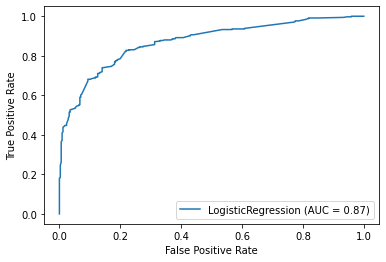

In [107]:
plot_roc_curve(model, df_train_x, df_train_y)

In [108]:
param_grid = { 
    'penalty': ['l1','l2','elasticnet'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50,60,70,100,150],
    'l1_ratio' : [0,0.2,0.4,0.6,0.8,1]
}

In [109]:
CV_LogisticRegression=GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=3, cv= 5)

In [110]:
CV_LogisticRegression.fit(df_train_x,df_train_y)
#CV_rfc.fit(train_scaled, df_train_1_y)
print('RFC best parameters :', CV_LogisticRegression.best_params_)

RFC best parameters : {'l1_ratio': 0.8, 'max_iter': 70, 'penalty': 'l1', 'solver': 'saga'}


In [111]:
# Now let us split the train as train & test to validate the model

In [112]:
df_train_1_x, df_train_test_x, df_train_1_y, df_train_test_y = train_test_split(df_train_x,df_train_y, test_size = 0.3,random_state=12)

In [113]:
df_train_test_x.shape,df_train_1_x.shape

((206, 10), (478, 10))

In [141]:
model_1 = LogisticRegression(l1_ratio= 0.8, max_iter = 70, penalty= 'l1', solver='saga')

In [142]:
model_1.fit(df_train_1_x, df_train_1_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.8, max_iter=70,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
df_train_test_y_pred=model_1.predict(df_train_test_x)

In [144]:
metric_res('train_test',df_train_test_y,df_train_test_y_pred)

train_test  confusion_matrix 
 [[83 32]
 [17 74]]
train_test  accuracy_score     :  0.7621359223300971
train_test  recall_score       :  0.8131868131868132
train_test  precision_score    :  0.6981132075471698
train_test  train f1_score     :  0.751269035532995
train_test  train roc_auc_score:  0.7674629718107979
train_test  classification report 
               precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       115
         1.0       0.70      0.81      0.75        91

    accuracy                           0.76       206
   macro avg       0.76      0.77      0.76       206
weighted avg       0.77      0.76      0.76       206



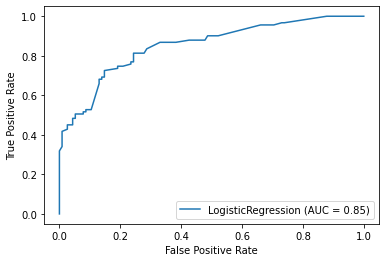

In [145]:
plot_roc_curve(model_1, df_train_test_x, df_train_test_y)

In [146]:
# Further to validate let us test this model with cross_val_score to see the average
# model_1 ie after train_test_split, gives 82.38% accuracy with cross_val_score
# model ie before train_test_split also gives 82.38% accuracy with cross_val_score

In [147]:
score=cross_val_score(model,df_train_x,df_train_y,cv=12,scoring='accuracy')

In [148]:
score.mean()

0.7880116959064328

In [149]:
df_test_y_pred=model.predict(df_test_x)

In [150]:
df_test_y_pred=pd.DataFrame(df_test_y_pred)

In [151]:
df_test_y_pred.rename(columns={0:'Survived'},inplace=True)


In [152]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  source       418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [153]:

gender_submission=pd.concat([pd.DataFrame(test['PassengerId']),df_test_y_pred],axis=1)
gender_submission=gender_submission.astype({'Survived':int})

In [154]:
df_test_y_pred

,Survived
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


In [155]:
gender_submission.to_csv('gender_submission.csv',index=False)

In [156]:
def create_poly(p_train,p_test, degree):
    poly = PolynomialFeatures(degree = degree)
    train_poly = poly.fit_transform(p_train)
    test_poly = poly.fit_transform(p_test)
    return train_poly, test_poly

In [157]:
def model_fit(alg,train,test,y_train,y_test,scaler,if_cv = True,cv_folds = 5):
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    alg.fit(train_scaled,y_train)
    
    #performing Cross Validation
    if if_cv: 
        cv_score = cross_val_score(alg,train_scaled,y_train,cv = cv_folds,scoring = 'accuracy')
    
    predictions = alg.predict(test)
    
    #Print 
    print("\n Model Report")
    print(classification_report(y_test,predictions))
    
    if if_cv: 
        print("CV REPORT :- Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    print("Accuracy: ",accuracy_score(y_test,predictions))
    print('-'*100)
    
    confu = pd.DataFrame(confusion_matrix(y_test,predictions))
    print(confu)

In [159]:
# KNN implementation

In [176]:
def KNN_predicts(train, train_test,y_train,y_test,scaler,neighbours, metric ='euclidean', weights = 'distance'):
    train_scaled = scaler.fit_transform(train)
    train_test_scaled = scaler.transform(train_test)

    KNN = KNeighborsClassifier(n_neighbors =neighbours,leaf_size=35,metric = metric,weights = weights,n_jobs= 3)
    KNN.fit(train_scaled,y_train)
    predictions = KNN.predict(train_test_scaled)
    

    
    print("Accuracy: ",accuracy_score(y_test,predictions))
    print('-'*100)
    return KNN

In [177]:
knn_model=KNN_predicts(df_train_1_x, df_train_test_x, df_train_1_y, df_train_test_y, StandardScaler(), 17,weights='distance') 

Accuracy:  0.7718446601941747
----------------------------------------------------------------------------------------------------


In [178]:
for k in range(1,21):
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(k), end = ' ')
    knn_model=KNN_predicts(df_train_1_x, df_train_test_x, df_train_1_y, df_train_test_y, StandardScaler(), k,weights = 'uniform')

Accuracy score on kNN using n_neighbours = 1: Accuracy:  0.6990291262135923
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 2: Accuracy:  0.7572815533980582
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 3: Accuracy:  0.7815533980582524
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 4: Accuracy:  0.7864077669902912
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 5: Accuracy:  0.7766990291262136
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 6: Accuracy:  0.7766990291262136
---------------------------------------

In [136]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [137]:
param_grid = { 
    'n_neighbors': [1,3,5,7,9,11,13,15,17],
    'leaf_size': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35],
    'metric': ['euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis'],
    'weights': ['uniform', 'distance']
}

CV_rfc = GridSearchCV(estimator=knn_model, param_grid=param_grid,n_jobs=3, cv= 5)
scaler=StandardScaler()
train_scaled = scaler.fit_transform(df_train_x)
CV_rfc.fit(train_scaled,df_train_y)
#CV_rfc.fit(train_scaled, df_train_1_y)
print('RFC best parameters :', CV_rfc.best_params_)

RFC best parameters : {'leaf_size': 35, 'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}


train_test  confusion_matrix 
 [[85 30]
 [19 72]]
train_test  accuracy_score     :  0.7621359223300971
train_test  recall_score       :  0.7912087912087912
train_test  precision_score    :  0.7058823529411765
train_test  train f1_score     :  0.7461139896373057
train_test  train roc_auc_score:  0.7651696129956999
train_test  classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       115
         1.0       0.71      0.79      0.75        91

    accuracy                           0.76       206
   macro avg       0.76      0.77      0.76       206
weighted avg       0.77      0.76      0.76       206

train  confusion_matrix 
 [[266  76]
 [ 67 275]]
train  accuracy_score     :  0.7909356725146199
train  recall_score       :  0.804093567251462
train  precision_score    :  0.7834757834757835
train  train f1_score     :  0.7936507936507936
train  train roc_auc_score:  0.7909356725146199
train  classification report 
    

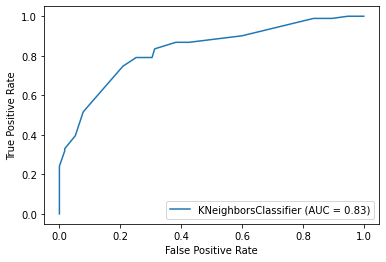

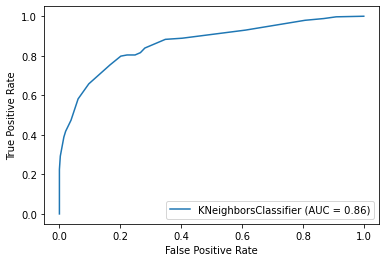

In [168]:
scaler=StandardScaler()
train_scaled = scaler.fit_transform(df_train_1_x)
train_test_scaled = scaler.transform(df_train_test_x)
test_scaled = scaler.transform(df_test_x)
df_train_test_y_pred = knn_model.predict(train_test_scaled)
metric_res( 'train_test',df_train_test_y,df_train_test_y_pred)
plot_roc_curve(knn_model, train_test_scaled, df_train_test_y)
## for the whole train data

train_scaled = scaler.transform(df_train_x)
df_train_y_pred = knn_model.predict(train_scaled)
metric_res('train', df_train_y,df_train_y_pred)
plot_roc_curve(knn_model, train_scaled, df_train_y)

In [169]:
cv_score = cross_val_score(knn_model,train_scaled,df_train_y,cv = 5,scoring = 'accuracy')
cv_score.mean()

0.7822241305281237

In [170]:
df_test_y_pred = knn_model.predict(test_scaled)


In [171]:
submission_file_generation( knn_model,test_scaled)

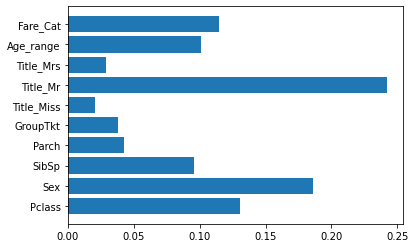

In [172]:
rfc_model = RandomForestClassifier(n_estimators=28,criterion='gini',min_samples_split=6,max_features='log2',random_state=1,n_jobs=3)
scaler = StandardScaler()
train_1_scaled = scaler.fit_transform(df_train_1_x)
train_test_scaled = scaler.transform(df_train_test_x)
test_scaled = scaler.transform(df_test_x)
rfc_model.fit(train_1_scaled, df_train_1_y)
#rfc_model.fit(df_train_1_x,df_train_1_y)
rfc_find_important_features(rfc_model,df_train_1_x)


In [173]:
param_grid = { 
     'criterion' : ['gini','entropy'],
    'n_estimators': [10,15,20,25,27,28,30,40,41,42,43,44,45,46,47],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [4,5,6,7,8,9,10,11,12]
}

CV_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid,n_jobs=3, cv= 5)
#CV_rfc.fit(df_train_1_x,df_train_1_y)
CV_rfc.fit(train_1_scaled, df_train_1_y)
print('RFC best parameters :', CV_rfc.best_params_)

RFC best parameters : {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 7, 'n_estimators': 15}


train_test  confusion_matrix 
 [[79 36]
 [18 73]]
train_test  accuracy_score     :  0.7378640776699029
train_test  recall_score       :  0.8021978021978022
train_test  precision_score    :  0.6697247706422018
train_test  train f1_score     :  0.7300000000000001
train_test  train roc_auc_score:  0.7445771619684665
train_test  classification report 
               precision    recall  f1-score   support

         0.0       0.81      0.69      0.75       115
         1.0       0.67      0.80      0.73        91

    accuracy                           0.74       206
   macro avg       0.74      0.74      0.74       206
weighted avg       0.75      0.74      0.74       206



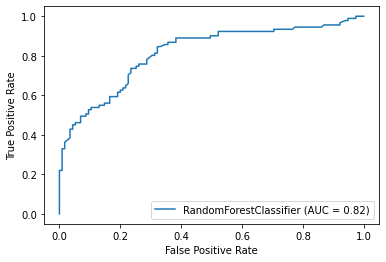

In [253]:
rfc_model = RandomForestClassifier(n_estimators=42,criterion='gini',min_samples_split=12,max_features='auto',random_state=1,n_jobs=3)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train_x)
train_1_scaled = scaler.transform(df_train_1_x)
train_test_scaled = scaler.transform(df_train_test_x)
#test_scaled = scaler.transform(df_test_x)
#rfc_model.fit(df_train_1_x, df_train_1_y)
rfc_model.fit(train_1_scaled,df_train_1_y)
#pd.Series(model.coef_,index=test_x.columns).plot(kind = "bar")
#df_train_test_y_pred=CV_rfc.predict(train_test_scaled)
df_train_test_y_pred=rfc_model.predict(train_test_scaled)
#df_train_test_y_pred=rfc_model.predict(df_train_test_x)
#df_train_1_y_pred = 
#pred_test = abs(pred_train)
metric_res( 'train_test',df_train_test_y,df_train_test_y_pred)
plot_roc_curve(rfc_model, train_test_scaled, df_train_test_y)

In [254]:
df_train_x.shape

(684, 8)

In [255]:
train_scaled.shape

(684, 8)

cv_score mean 0.6125053671103478
train  confusion_matrix 
 [[257  85]
 [ 67 275]]
train  accuracy_score     :  0.7777777777777778
train  recall_score       :  0.804093567251462
train  precision_score    :  0.7638888888888888
train  train f1_score     :  0.7834757834757835
train  train roc_auc_score:  0.7777777777777778
train  classification report 
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       342
         1.0       0.76      0.80      0.78       342

    accuracy                           0.78       684
   macro avg       0.78      0.78      0.78       684
weighted avg       0.78      0.78      0.78       684



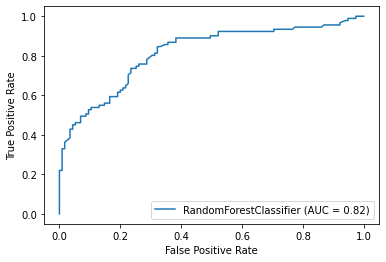

In [258]:
cv_score = cross_val_score(rfc_model,train_scaled,df_train_y,cv = 5,scoring = 'accuracy')
print('cv_score mean', cv_score.mean())
train_y_pred = rfc_model.predict(train_scaled)
metric_res('train', df_train_y,df_train_y_pred)
plot_roc_curve(rfc_model, train_test_scaled, df_train_test_y)

In [197]:
rfc_model.predict_proba(df_train_test_x)

array([[0.90617914, 0.09382086],
       [0.90617914, 0.09382086],
       [0.90617914, 0.09382086],
       [0.85607993, 0.14392007],
       [0.90617914, 0.09382086],
       [0.90617914, 0.09382086],
       [0.95238095, 0.04761905],
       [0.85607993, 0.14392007],
       [0.85607993, 0.14392007],
       [0.90617914, 0.09382086],
       [0.85607993, 0.14392007],
       [1.        , 0.        ],
       [0.90617914, 0.09382086],
       [0.85607993, 0.14392007],
       [0.87988946, 0.12011054],
       [0.85607993, 0.14392007],
       [0.90617914, 0.09382086],
       [0.85607993, 0.14392007],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.90617914, 0.09382086],
       [0.90617914, 0.09382086],
       [0.90617914, 0.09382086],
       [0.87988946, 0.12011054],
       [0.95238095, 0.04761905],
       [0.90617914, 0.09382086],
       [0.85607993, 0.14392007],
       [0.85607993, 0.14392007],
       [0.85607993, 0.14392007],
       [0.85607993, 0.14392007],
       [1.

In [198]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   GroupTkt     418 non-null    int32
 4   Title_Miss   418 non-null    uint8
 5   Title_Mr     418 non-null    uint8
 6   Title_Mrs    418 non-null    uint8
 7   Fare_Cat     418 non-null    int64
dtypes: int32(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [199]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   GroupTkt     418 non-null    int32
 4   Title_Miss   418 non-null    uint8
 5   Title_Mr     418 non-null    uint8
 6   Title_Mrs    418 non-null    uint8
 7   Fare_Cat     418 non-null    int64
dtypes: int32(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [259]:
submission_file_generation(rfc_model,test_scaled)

In [201]:
type(df_train_test_y_pred)

numpy.ndarray

In [202]:
type(df_train_test_y)

pandas.core.series.Series

In [260]:
df1=pd.DataFrame(df_train_test_y)
df1['old_index']=df1.index
df1.reset_index(level=0, inplace=True)
df1.drop(columns=['old_index'],inplace=True)
df2=pd.DataFrame(df_train_test_y_pred)
df2.rename(columns={0:'Survived_pred'},inplace=True)
df1 = pd.concat([df1,df2],axis=1)
df1=df1.set_index('index')
df_train.iloc[list(df1[((df1['Survived']==1) & (df1['Survived_pred']==0))].index)].corr()
#df_train['Survived'].isnull().sum()

,PassengerId,Survived,Pclass,Sex,GroupTkt,Title_Miss,Title_Mr,Title_Mrs,Fare_Cat
PassengerId,1.000000,NaN,0.409106,-0.133783,-0.465338,0.326884,0.027353,-0.289022,-0.437469
Survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,0.409106,NaN,1.000000,-0.346844,-0.503027,0.290191,-0.286770,0.157378,-0.755491
Sex,-0.133783,NaN,-0.346844,1.000000,0.033150,-0.836660,0.755929,-0.453743,0.419717
GroupTkt,-0.465338,NaN,-0.503027,0.033150,1.000000,-0.277350,-0.350823,0.391077,0.812740
Title_Miss,0.326884,NaN,0.290191,-0.836660,-0.277350,1.000000,-0.632456,-0.108465,-0.460142
Title_Mr,0.027353,NaN,-0.286770,0.755929,-0.350823,-0.632456,1.000000,-0.342997,0.038292
Title_Mrs,-0.289022,NaN,0.157378,-0.453743,0.391077,-0.108465,-0.342997,1.000000,-0.013134
Fare_Cat,-0.437469,NaN,-0.755491,0.419717,0.812740,-0.460142,0.038292,-0.013134,1.000000


In [ ]:
df_train

In [261]:
df1[((df1['Survived']==0) & (df1['Survived_pred']==1))].index

Int64Index([745, 392, 634, 671, 282, 678, 229, 698, 240, 789, 396, 793, 602,
            278, 694, 167, 362, 736, 147, 502, 642, 638, 578, 284, 372, 748,
            555, 401,  40, 293, 534, 854, 251, 505, 295,  38],
           dtype='int64', name='index')

In [262]:
df_test_x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'GroupTkt', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Fare_Cat'],
      dtype='object')

In [1]:

from sklearn.feature_selection import SelectKBest, f_classif

#predictors = ['SibSp','Parch','Sex', 'Age_range','Fare_Cat','Family_Size','Pclass_1','Pclass_2','Pclass_3','Title_Mr','Title_Miss','Title_Mrs','Embarked_C','Embarked_Q','Embarked_S','PassengerId']

predictors = ['Sex','Fare_Cat','Pclass','Age_range','Title_Mr','Title_Miss','Title_Mrs','GroupTkt','SibSp','Parch']

# Perform feature selection
selector = SelectKBest(f_classif, k='all')
selector.fit(df_train[predictors], train["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')


NameError: name 'df_train' is not defined

In [264]:
LogReg_model = LogisticRegression(l1_ratio= 0, max_iter = 50, penalty= 'l2', solver='newton-cg')
#logreg_cv = LogisticRegressionCV()
RFC_model = RandomForestClassifier(n_estimators=42,criterion='gini',min_samples_split=12,max_features='auto',random_state=1,n_jobs=3)
knn_model= KNeighborsClassifier(n_neighbors =7,leaf_size=5,metric ='chebyshev', weights = 'uniform',n_jobs= 3)

models = [LogReg_model, RFC_model,knn_model]

In [265]:
#Blending models

trained_models = []
for model in models:
    print('model :',model)
    if (model=='knn_model'):
        scaler=StandardScaler()
        train_scaled = scaler.fit_transform(df_train_x)
        test_scaled = scaler.transform(df_test_x)        
        model.fit(train_scaled,df_train_y)
    else:
        model.fit(df_train_x, df_train_y)
    trained_models.append(model)

predictions = []
for model in trained_models:
    if (model=='knn_model'):
        predictions.append(model.predict_proba(test_scaled)[:, 1])
    else:
        predictions.append(model.predict_proba(df_test_x)[:, 1])
print('Predictions ',predictions)
predictions_df1=pd.DataFrame(predictions)
print('DF Shape ',predictions_df1.shape)
predictions_df = pd.DataFrame(predictions).T
print('Predictions DF :',predictions_df)
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = test['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=3,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
model : KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='chebyshev',
                     metric_params=No

In [266]:
predictions_df.to_csv('gender_submission.csv',index=False)

In [267]:
model.predict_proba(test_scaled)

array([[0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.

In [268]:
# Adaboost
model=AdaBoostClassifier()
model.fit(df_train_x, df_train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [269]:
model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [270]:
param_grid = { 'n_estimators':[10,20,30,50], 'learning_rate':[0.05,0.25,0.50,0.75,1,2]}

In [271]:
CV_AdaBoostModel = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=3, cv= 5)
CV_AdaBoostModel.fit(train_1_scaled, df_train_1_y)
print('RFC best parameters :', CV_AdaBoostModel.best_params_)

RFC best parameters : {'learning_rate': 0.25, 'n_estimators': 20}


In [275]:
# There was a column 'old_index' and 'index' in df_train_test_y. Not sure how this was added to this df
df_train_test_y.drop(columns=['old_index'],inplace=True)
df_train_test_y=df_train_test_y.set_index('index')

train_test  confusion_matrix 
 [[79 36]
 [18 73]]
train_test  accuracy_score     :  0.7378640776699029
train_test  recall_score       :  0.8021978021978022
train_test  precision_score    :  0.6697247706422018
train_test  train f1_score     :  0.7300000000000001
train_test  train roc_auc_score:  0.7445771619684665
train_test  classification report 
               precision    recall  f1-score   support

         0.0       0.81      0.69      0.75       115
         1.0       0.67      0.80      0.73        91

    accuracy                           0.74       206
   macro avg       0.74      0.74      0.74       206
weighted avg       0.75      0.74      0.74       206



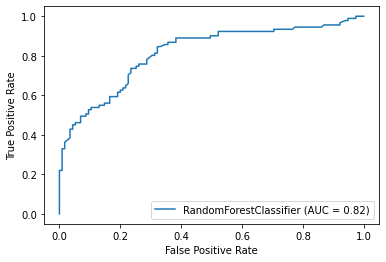

In [276]:
model=AdaBoostClassifier(n_estimators=20,learning_rate=0.25)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train_x)
train_1_scaled = scaler.transform(df_train_1_x)
train_test_scaled = scaler.transform(df_train_test_x)
rfc_model.fit(train_1_scaled,df_train_1_y)
df_train_test_y_pred=rfc_model.predict(train_test_scaled)
metric_res('train_test',df_train_test_y,df_train_test_y_pred)
plot_roc_curve(rfc_model, train_test_scaled, df_train_test_y)


In [277]:
df_train_test_y.head()

,Survived
index,
842,1.0
590,0.0
518,1.0
37,0.0
159,0.0


In [282]:
#GradientBoosting
model=GradientBoostingClassifier()
model.fit(df_train_x, df_train_y)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [283]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [288]:
param_grid = { 'n_estimators':[3,5,8,10,20,30,50], 'max_depth':[1,2,3,5,10,20,30],'max_features' :['auto']}

In [289]:
CV_GBModel = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=3, cv= 5,verbose=2)
CV_GBModel.fit(train_1_scaled, df_train_1_y)
print('RFC best parameters :', CV_GBModel.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 178 tasks      | elapsed:    3.0s


RFC best parameters : {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 50}


[Parallel(n_jobs=3)]: Done 245 out of 245 | elapsed:    5.7s finished


In [299]:
GB_Model = GradientBoostingClassifier(max_depth=2,
                           max_features='auto',
                           n_estimators=50,
                           random_state=None, 
                           verbose=3,
                           warm_start=False)

      Iter       Train Loss   Remaining Time 
         1           1.3089            0.05s
         2           1.2470            0.05s
         3           1.1954            0.05s
         4           1.1523            0.05s
         5           1.1154            0.05s
         6           1.0844            0.05s
         7           1.0578            0.05s
         8           1.0350            0.05s
         9           1.0153            0.05s
        10           0.9981            0.04s
        11           0.9833            0.04s
        12           0.9698            0.04s
        13           0.9583            0.04s
        14           0.9492            0.04s
        15           0.9415            0.04s
        16           0.9346            0.04s
        17           0.9267            0.04s
        18           0.9199            0.04s
        19           0.9152            0.04s
        20           0.9078            0.04s
        21           0.9039            0.04s
        2

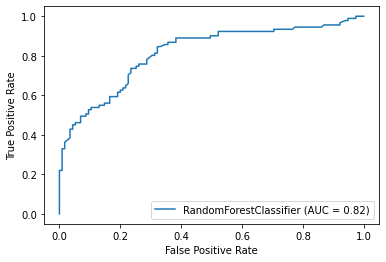

In [303]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train_x)
train_1_scaled = scaler.transform(df_train_1_x)
train_test_scaled = scaler.transform(df_train_test_x)
test_scaled = scaler.transform(df_test_x)
GB_Model.fit(train_1_scaled, df_train_1_y)
df_train_test_y_pred=rfc_model.predict(train_test_scaled)
metric_res('train_test',df_train_test_y,df_train_test_y_pred)
plot_roc_curve(rfc_model, train_test_scaled, df_train_test_y)


In [307]:
model_name, accuracy, f1score = run_model_validate(model,train_scaled, df_train_y, train_test_scaled, df_train_test_y)

********************************************************************************
Model Name :  GradientBoostingClassifier
train  confusion_matrix 
 [[308  34]
 [ 45 297]]
train  accuracy_score     :  0.8845029239766082
train  recall_score       :  0.868421052631579
train  precision_score    :  0.8972809667673716
train  train f1_score     :  0.8826151560178307
train  train roc_auc_score:  0.8845029239766082
train  classification report 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       342
         1.0       0.90      0.87      0.88       342

    accuracy                           0.88       684
   macro avg       0.88      0.88      0.88       684
weighted avg       0.88      0.88      0.88       684

test   confusion_matrix 
 [[102  13]
 [  9  82]]
test   accuracy_score     :  0.8932038834951457
test   recall_score       :  0.9010989010989011
test   precision_score    :  0.8631578947368421
test   train f1_score     :  0.88172043

In [308]:
submission_file_generation(model_name,test_scaled)

In [174]:
model=XGBClassifier()
model_name, accuracy, f1score = run_model_validate(model,train_scaled, df_train_y, train_test_scaled, df_train_test_y)

********************************************************************************
Model Name :  XGBClassifier
train  confusion_matrix 
 [[315  27]
 [ 63 279]]
train  accuracy_score     :  0.868421052631579
train  recall_score       :  0.8157894736842105
train  precision_score    :  0.9117647058823529
train  train f1_score     :  0.861111111111111
train  train roc_auc_score:  0.868421052631579
train  classification report 
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       342
         1.0       0.91      0.82      0.86       342

    accuracy                           0.87       684
   macro avg       0.87      0.87      0.87       684
weighted avg       0.87      0.87      0.87       684

test   confusion_matrix 
 [[105  10]
 [ 19  72]]
test   accuracy_score     :  0.8592233009708737
test   recall_score       :  0.7912087912087912
test   precision_score    :  0.8780487804878049
test   train f1_score     :  0.8323699421965318
test  

array([[ 0.92449317,  0.85917508, -0.49764921, ..., -0.4650645 ,
         0.78996734, -1.4375059 ],
       [ 0.92449317, -1.16390713,  0.42079219, ...,  2.15023938,
         0.78996734, -1.4375059 ],
       [-0.23536965,  0.85917508, -0.49764921, ..., -0.4650645 ,
         1.966305  , -0.54859539],
       ...,
       [ 0.92449317,  0.85917508, -0.49764921, ..., -0.4650645 ,
         0.78996734, -1.4375059 ],
       [ 0.92449317,  0.85917508, -0.49764921, ..., -0.4650645 ,
        -0.38637032, -0.54859539],
       [ 0.92449317,  0.85917508,  0.42079219, ..., -0.4650645 ,
        -1.56270798,  0.34031511]])

In [175]:
submission_file_generation(model_name,test_scaled)

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [207]:
train_y=train['Survived']
test_x=test


In [208]:
train_x = train.drop(['Name', 'Ticket', 'Cabin','Survived'],axis=1) 
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'],axis=1) 

In [209]:
test_x['Sex']=np.where(test_x['Sex']=='male',1,0)
train_x['Sex']=np.where(train_x['Sex'] == 'male',1,0)

In [211]:
embarked_order = {'S' : 0, 'C' : 1, 'Q' : 2}
train_x['Embarked'] = train_x['Embarked'].map(embarked_order)


In [219]:
test_x['Embarked'] = test_x['Embarked'].map(embarked_order)

In [ ]:
df_to_encode=df_all['Embarked']
encoded=pd.get_dummies(df_to_encode,prefix='Embarked',prefix_sep='_')

In [212]:
model=XGBClassifier()

In [213]:
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [220]:
test_y_pred = model.predict(test_x)

In [224]:
train_y_pred = model.predict(train_x)

In [225]:
metric_res('train',train_y,train_y_pred)

train  confusion_matrix 
 [[549   0]
 [  1 341]]
train  accuracy_score     :  0.9988776655443322
train  recall_score       :  0.9970760233918129
train  precision_score    :  1.0
train  train f1_score     :  0.9985358711566619
train  train roc_auc_score:  0.9985380116959064
train  classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [221]:
test_y_pred = pd.DataFrame(test_y_pred)
test_y_pred.rename(columns={0:'Survived'},inplace=True)

In [222]:

gender_submission=pd.concat([pd.DataFrame(test['PassengerId']),test_y_pred],axis=1)
gender_submission=gender_submission.astype({'Survived':int})

In [223]:
gender_submission.to_csv('gender_submission.csv',index=False)